In [1]:
import pandas as pd
import numpy as np
import matplotlib
import arabic_reshaper

from pandas.compat import u
from bidi import algorithm as bidialg
from matplotlib import pyplot as plt
matplotlib.rc('font', family='Arial')

def ar_reshape(arabic_text):
    return bidialg.get_display(arabic_reshaper.reshape(arabic_text))

def ar_reshape_list(arabic_list_text):
    list_text = []
    for i, arabic_text in enumerate(arabic_list_text) :
        list_text.insert(i,  bidialg.get_display(arabic_reshaper.reshape(arabic_text)))
    return list_text

%matplotlib inline

In [2]:
RAINFALL_FILE = 'rainfall.txt'
rain_raw = pd.read_table(RAINFALL_FILE)

#rain_raw.info()
#rain_raw.describe()
rain_raw.head()

,المدينة,يناير,فبراير,مارس,أبريل,مايو,يونيو,يوليو,أغسطس,سبتمبر,أكتوبر,نوفمبر,ديسمبر
0,طريف,7,2,1,2,6,0,0,0,0,0,7,9
1,عرعر,6,2,1,3,2,0,0,0,0,0,15,3
2,القريات,6,3,0,0,5,0,0,0,0,2,9,5
3,الجوف,16,1,0,0,4,0,0,0,0,0,0,14
4,رفحة,14,4,6,1,12,0,0,0,0,8,19,5


In [3]:

y = ar_reshape_list(rain_raw['المدينة'])
y
rain_df = rain_raw.copy()
rain_df

,المدينة,يناير,فبراير,مارس,أبريل,مايو,يونيو,يوليو,أغسطس,سبتمبر,أكتوبر,نوفمبر,ديسمبر
0,طريف,7,2,1,2,6,0,0,0,0,0,7,9
1,عرعر,6,2,1,3,2,0,0,0,0,0,15,3
2,القريات,6,3,0,0,5,0,0,0,0,2,9,5
3,الجوف,16,1,0,0,4,0,0,0,0,0,0,14
4,رفحة,14,4,6,1,12,0,0,0,0,8,19,5
5,القيصومة,0,0,0,2,0,0,0,0,0,1,10,3
6,تبوك,11,2,0,1,3,0,0,0,0,0,0,9
7,حفر الباطن,0,1,6,0,3,0,0,0,0,0,0,0
8,حائل,8,0,0,2,3,0,0,0,0,4,5,1
9,الوجه,5,3,0,0,0,0,0,0,0,0,4,2


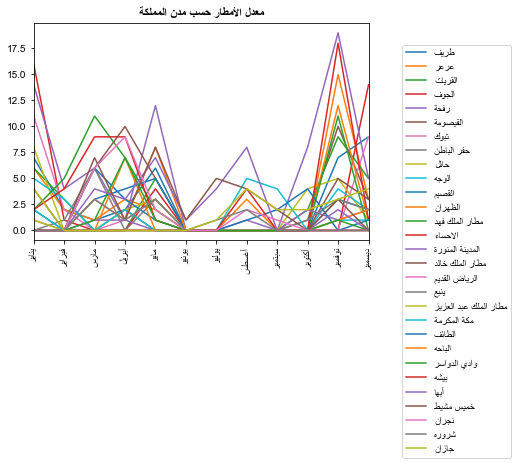

In [4]:
modified_col = ar_reshape_list(rain_df.columns[1:])
ax = plt.subplot(1,1,1);

for i, item in enumerate(y):
    rain_df.T.iloc[1:13,i].plot(ax=ax, label=y[i]);
ax.legend(loc=(1.1,-1));
ax.set_title(ar_reshape('معدل الأمطار حسب مدن المملكة'), weight='bold', size='large')
plt.xticks(range(12), modified_col, rotation=90);

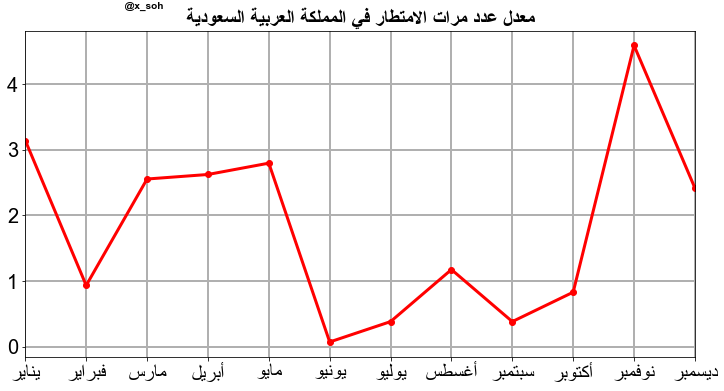

In [5]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6)
ax2 = plt.subplot(1,1,1);
rain_df.iloc[0:,1:].mean().plot(ax=ax2, marker='o', linewidth=3, color='r')
ax2.set_title(ar_reshape('معدل عدد مرات الامتطار في المملكة العربية السعودية'), weight='bold', size='20')
plt.xticks(range(12), modified_col, size='20');
plt.yticks(size='20');
ax2.grid(linewidth=2);
text_source = ar_reshape('المصدر: الرئاسة العامة للأرصاد و حماية البيئة') + '\n @x_soh'
matplotlib.pyplot.text(0.1, 1.1, text_source, weight='bold' , transform=ax.transAxes);



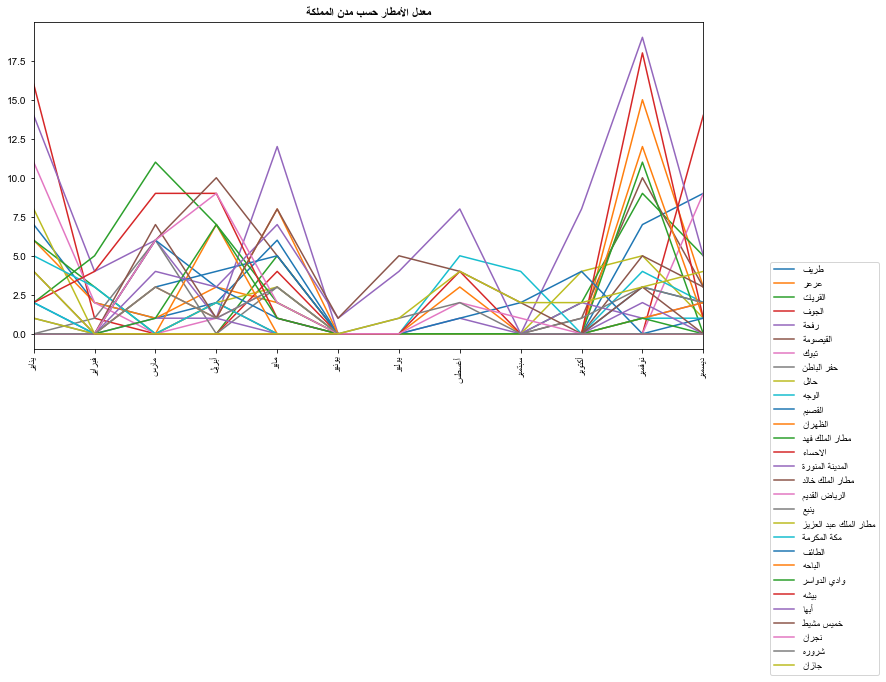

In [6]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6)

modified_col = ar_reshape_list(rain_df.columns[1:])
ax = plt.subplot(1,1,1);

for i, item in enumerate(y):
    rain_df.T.iloc[1:13,i].plot(ax=ax, label=y[i]);
ax.legend(loc=(1.1,-1));
ax.set_title(ar_reshape('معدل الأمطار حسب مدن المملكة'), weight='bold', size='large')
plt.xticks(range(12), modified_col, rotation=90);

In [7]:
dataf = rain_df.iloc[0:,1:].mean().reset_index()
dataf.columns = ('MonthName', 'AvgNumOfRain')
dataf.sort_values('AvgNumOfRain', ascending=False)

,MonthName,AvgNumOfRain
10,نوفمبر,4.586207
0,يناير,3.137931
4,مايو,2.793103
3,أبريل,2.620690
2,مارس,2.551724
11,ديسمبر,2.413793
7,أغسطس,1.172414
1,فبراير,0.931034
9,أكتوبر,0.827586
6,يوليو,0.379310
